# Análise de Microdados do Enem

O Exame Nacional do Ensino Médio (Enem) é uma prova de admissão à educação superior realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), autarquia vinculada ao Ministério da Educação do Brasil. 


O exame foi criado em 1998 com o objetivo de prover uma forma de avaliar anualmente o aprendizado dos alunos do ensino médio em todo o país, e para auxiliar o ministério na elaboração de políticas pontuais e estruturais de melhoria do ensino brasileiro. Foi a primeira iniciativa de avaliação geral do sistema de ensino implantado no Brasil.


A partir de 2004, o Enem passou a ser usado no ingresso de candidatos em cursos superiores. Com a nota do exame, estudantes poderiam se inscrevessem para conseguir bolsa de estudo em faculdades particulares pelo ProUni.

Em 2009, foi introduzido um novo modelo de prova para o Enem, com a proposta de unificar o concurso vestibular das universidades federais brasileiras.


O Questionário Socioeconômico do Enem compreende um conjunto de perguntas sobre a situação do candidato, incluindo ano de formação do ensino médio, tipo de escola, renda, profissão, entre outras. Ele passou a ser aplicado em 2003 com objetivo de colher informações importantes que podem servir de base para a formulação de novas políticas públicas na área da educação.

As informações coletadas são muito ricas e possuem potencial para diversos tipos de análise.
As informações do Questionário Socioeconômico, bem como do desempenho dos candidatos ficam disponíveis nos **microdados** -  [Microdados do Enem no site do INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem).

**Observação.** O formato atual disponível dos microdados foi alterado em atendimento às normas previstas na Lei n.º 13.709, de 14 de agosto de 2018 (Lei Geral de Proteção de Dados Pessoais – LGPD). O arquivo utilizado nesta análise foi coletado antes da reestruturação dos microdados.


In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# O arquivo está salvo em um diretório local, em formato compactado.
import zipfile

# ver nome dos arquivos na pasta compactada
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
    print(*z.namelist(), sep="\n")

LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_04_DIA_1_ROSA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_05_DIA_2_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO.pdf.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_03_D

Considerando o tamanho da base de dados, vamos inicialmente carregar apenas os nomes das variáveis e escolher quais delas estarão no dataframe analisado.

In [3]:
# Abrir arquivo de dados e verificar nome de colunas
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as dados:
        dfcol = pd.read_csv(dados, sep=';', encoding='ISO-8859-1', nrows=0)

In [4]:
# Imprimir nomes das variáveis
dfcol.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [5]:
# Selecionar informações/variáveis considerando objetivos da análise 
colunas_selecionadas = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
                        'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
                        'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
                        'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
                        'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
                        'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_PRESENCA_CN', 
                        'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_STATUS_REDACAO',
                        'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 
                        'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
                        'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q024', 'Q025']

### Dicionário de informações/variáveis selecionadas

**Dados do participante**

- NU_INSCRICAO:	Número de inscrição1 
- NU_ANO: Ano do Enem
- CO_MUNICIPIO_RESIDENCIA:	Código do município de residência 
	- 1º dígito: Região
	- 1º e 2º dígitos: UF
	- 3º, 4º, 5º e 6º dígitos: Município
	- 7º dígito: dígito verificador
- NO_MUNICIPIO_RESIDENCIA:	Nome do município de residência
- SG_UF_RESIDENCIA:	Sigla da Unidade da Federação de residência
- NU_IDADE:	Idade
- TP_SEXO:	Sexo
- TP_COR_RACA:	Cor/raça

- TP_ST_CONCLUSAO: Situação de conclusão do Ensino Médio
- TP_ANO_CONCLUIU: Ano de Conclusão do Ensino Médio
- TP_ESCOLA: Tipo de escola do Ensino Médio
- TP_ENSINO: Tipo de instituição que concluiu ou concluirá o Ensino Médio 

**Dados da escola**
- CO_ESCOLA	Código da Escola
- CO_MUNICIPIO_ESC
	- Código do município da escola 
	- 1º dígito: Região
	- 1º e 2º dígitos: UF
	- 3º, 4º, 5º e 6º dígitos: Município
	- 7º dígito: dígito verificador
- NO_MUNICIPIO_ESC	Nome do município da escola
- CO_UF_ESC	Código da Unidade da Federação da escola
- SG_UF_ESC	Sigla da Unidade da Federação da escola
- TP_DEPENDENCIA_ADM_ESC	Dependência administrativa (Escola)
    - 1	Federal
    - 2	Estadual
    - 3	Municipal
    - 4	Privada
- TP_LOCALIZACAO_ESC	Localização (Escola)
    - 1 = urbana
    - 2 = rural
- TP_SIT_FUNC_ESC	Situação de funcionamento (Escola)


**Dados da prova objetiva e da redação**

- NU_NOTA_CN:	Nota da prova de Ciências da Natureza
- NU_NOTA_CH:	Nota da prova de Ciências Humanas
- NU_NOTA_LC:	Nota da prova de Linguagens e Códigos
- NU_NOTA_MT:	Nota da prova de Matemática

- NU_NOTA_REDACAO:	Nota da prova de redação

**Dados do Questionário Socioeconômico**

- Q001:	Até que série seu pai, ou o homem responsável por você, estudou?
- Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?
- Q003:	... ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você.
- Q004:	... ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você.
- Q005:	Incluindo você, quantas pessoas moram atualmente em sua residência?
- Q006:	Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
- Q024:	Na sua residência tem computador?
- Q025:	Na sua residência tem acesso à Internet?

Criar um dataframe com os vriáveis selecionadas

In [6]:
# Carregar apenas as colunas selecinadas e salvar em um Data Frame nomeado como 'df'
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as dados:
        df = pd.read_csv(dados, sep=';', encoding='ISO-8859-1', usecols= colunas_selecionadas)

In [7]:
# Visualizar dados (5 primeiras linhas)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q024,Q025
0,190001004627,2019,1506807,Santarém,PA,21,M,3,1,3,...,1.0,780.0,D,E,A,A,7,B,B,A
1,190001004628,2019,1504059,Mãe do Rio,PA,16,F,3,3,0,...,1.0,600.0,D,E,A,A,5,B,A,A
2,190001004629,2019,1505502,Paragominas,PA,18,F,1,2,0,...,1.0,640.0,H,E,A,D,3,C,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,PA,23,M,3,2,0,...,NaN,NaN,D,D,A,B,3,C,A,A
4,190001004631,2019,1503903,Juruti,PA,23,M,3,1,5,...,NaN,NaN,B,C,A,A,5,C,A,A


In [8]:
# Dimensão do dataframe
df.shape

(5095270, 42)

In [9]:
# Informações básicas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 42 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             int64  
 1   NU_ANO                   int64  
 2   CO_MUNICIPIO_RESIDENCIA  int64  
 3   NO_MUNICIPIO_RESIDENCIA  object 
 4   SG_UF_RESIDENCIA         object 
 5   NU_IDADE                 int64  
 6   TP_SEXO                  object 
 7   TP_COR_RACA              int64  
 8   TP_ST_CONCLUSAO          int64  
 9   TP_ANO_CONCLUIU          int64  
 10  TP_ESCOLA                int64  
 11  TP_ENSINO                float64
 12  CO_ESCOLA                float64
 13  CO_MUNICIPIO_ESC         float64
 14  NO_MUNICIPIO_ESC         object 
 15  CO_UF_ESC                float64
 16  SG_UF_ESC                object 
 17  TP_DEPENDENCIA_ADM_ESC   float64
 18  TP_LOCALIZACAO_ESC       float64
 19  TP_SIT_FUNC_ESC          float64
 20  TP_PRESENCA_CN           int64  
 21  TP_PRESE

Renomear variáveis para facilitar a análise.

In [10]:
# renomear variáveis
df.rename(columns={'NU_INSCRICAO': 'inscricao',
                   'SG_UF_RESIDENCIA':'uf_resid',
                   'NU_IDADE':'idade',
                   'TP_SEXO':'sexo',
                   'TP_COR_RACA':'cor',
                   'TP_ANO_CONCLUIU':'ano_conclusao',
                   'TP_DEPENDENCIA_ADM_ESC':'dep_escola',
                   'NU_NOTA_CN':'nota_cnatureza',
                   'NU_NOTA_CH':'nota_chumanas',
                   'NU_NOTA_LC':'nota_linguagens',
                   'NU_NOTA_MT':'nota_matematica',
                   'NU_NOTA_REDACAO':'nota_redacao',
                   'Q001':'escol_pai',
                   'Q002':'escol_mae',
                   'Q003':'ocup_pai',
                   'Q004':'ocup_mae',
                   'Q005':'npessoas_resid',
                   'Q006':'renda_familiar',
                   'Q024':'computador',
                   'Q025':'internet'}, inplace=True)

Verificar dados faltantes.

In [11]:
df.isnull().sum()

inscricao                        0
NU_ANO                           0
CO_MUNICIPIO_RESIDENCIA          0
NO_MUNICIPIO_RESIDENCIA          0
uf_resid                         0
idade                            0
sexo                             0
cor                              0
TP_ST_CONCLUSAO                  0
ano_conclusao                    0
TP_ESCOLA                        0
TP_ENSINO                  2217073
CO_ESCOLA                  3947858
CO_MUNICIPIO_ESC           3947858
NO_MUNICIPIO_ESC           3947858
CO_UF_ESC                  3947858
SG_UF_ESC                  3947858
dep_escola                 3947858
TP_LOCALIZACAO_ESC         3947858
TP_SIT_FUNC_ESC            3947858
TP_PRESENCA_CN                   0
TP_PRESENCA_CH                   0
TP_PRESENCA_LC                   0
TP_PRESENCA_MT                   0
CO_PROVA_CN                1384837
CO_PROVA_CH                1172125
CO_PROVA_LC                1172125
CO_PROVA_MT                1384837
nota_cnatureza      

In [12]:
## Excluir observações com valores faltantes
df.dropna(axis=0, inplace = True)

## Análise do desempenho por tipo de escola

### Tipo da escola

In [13]:
df['dep_escola'] = df['dep_escola'].map({1:'Federal', 2:'Estadual', 3:'Municipal', 4:'Privada'})

In [14]:
df['dep_escola'].unique()

array(['Privada', 'Estadual', 'Federal', 'Municipal'], dtype=object)

Existem valores faltantes (nan).

In [15]:
df['dep_escola'].value_counts(dropna=False)

Estadual     702523
Privada      153675
Federal       45779
Municipal      7217
Name: dep_escola, dtype: int64

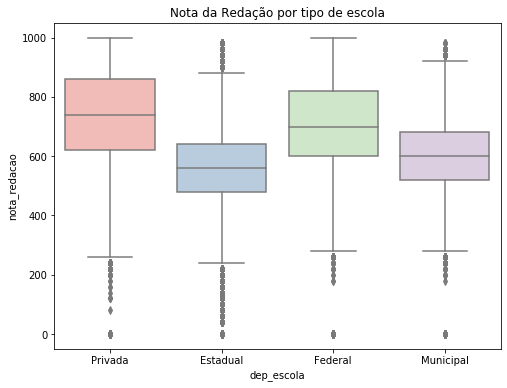

In [16]:
plt.figure(figsize = [8, 6])
sns.boxplot(data = df, x='dep_escola', y='nota_redacao', palette="Pastel1")
plt.title('Nota da Redação por tipo de escola');

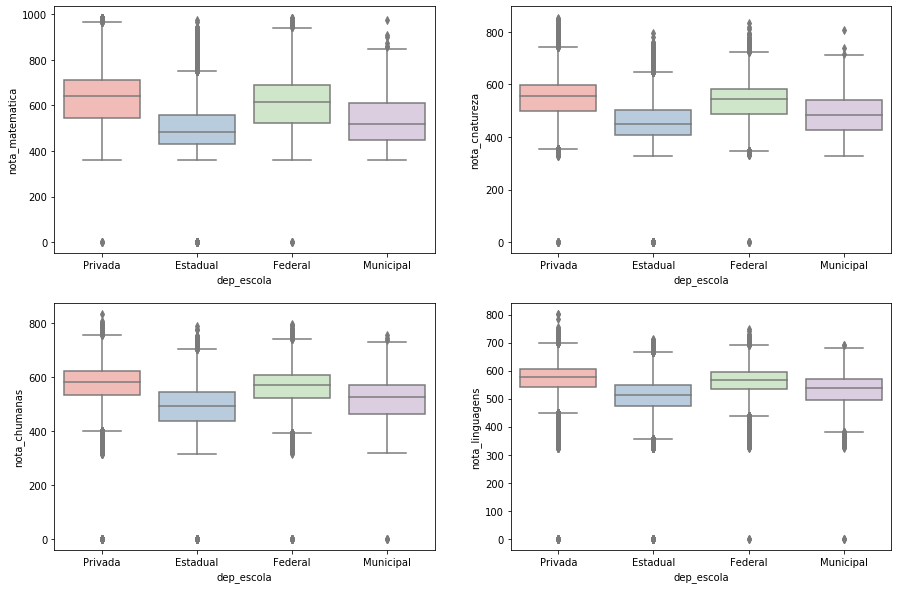

In [17]:
fig, axes = plt.subplots(2, 2, figsize = [15, 10])

#create boxplot in each subplot
sns.boxplot(data=df, x='dep_escola', y='nota_matematica', palette="Pastel1", ax=axes[0,0])
sns.boxplot(data=df, x='dep_escola', y='nota_cnatureza', palette="Pastel1", ax=axes[0,1])
sns.boxplot(data=df, x='dep_escola', y='nota_chumanas', palette="Pastel1", ax=axes[1,0])
sns.boxplot(data=df, x='dep_escola', y='nota_linguagens', palette="Pastel1", ax=axes[1,1])

plt.show()

- Agrupar em escolas públicas e privadas.
- Escolas federais possuem um perfil diferente das públicas estaduais e municipais.

In [18]:
df['tipo_escola'] = np.where((df['dep_escola'] == 'Privada') & (pd.isnull(df['dep_escola']) == False), 'Privada', 'Publica')

In [19]:
df[['dep_escola', 'tipo_escola']].head()  ## preciso corrigir NaN

,dep_escola,tipo_escola
2,Privada,Privada
7,Estadual,Publica
16,Estadual,Publica
24,Estadual,Publica
30,Estadual,Publica


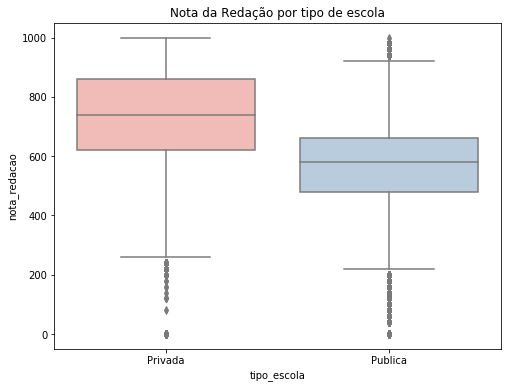

In [20]:
plt.figure(figsize = [8, 6])
sns.boxplot(data = df, x='tipo_escola', y='nota_redacao', palette="Pastel1")
plt.title('Nota da Redação por tipo de escola');

## Condição socioeconômica

In [33]:
# Renda
df.filter(items = ['inscricao', 'renda_familiar']).groupby('renda_familiar').count()

,inscricao
renda_familiar,
A,38201
B,230214
C,218705
D,76121
E,90835
F,39597
G,63145
H,35208
I,30371


In [35]:
dict_renda = {'A' : 'Nenhuma renda',
              'B' : 'Até 998,00',
              'C' : 'De 998,01 até 1.497,00',
              'D' : 'De 1.497,01 até 1.996,00',
              'E' : 'De 1.996,01 até 2.495,00',
              'F' : 'De 2.495,01 até 2.994,00',
              'G' : 'De 2.994,01 até 3.992,00',
              'H' : 'De 3.992,01 até 4.990,00',
              'I' : 'De 4.990,01 até 5.988,00',
              'J' : 'De 5.988,01 até 6.986,00',
              'K' : 'De 6.986,01 até 7.984,00',
              'L' : 'De 7.984,01 até 8.982,00',
              'M' : 'De 8.982,01 até 9.980,00',
              'N' : 'De 9.980,01 até 11.976,00',
              'O' : 'De 11.976,01 até 14.970,00',
              'P' : 'De 14.970,01 até 19.960,00',
              'Q' : 'Mais de 19.960,00'}


Criar uma nova coluna com a classe de renda baseada no dicionário.

In [45]:
df['classe_renda'] = [dict_renda[classe] for classe in df['renda_familiar'] ]

df.filter(items = ['inscricao', 'classe_renda']).groupby('classe_renda').count().sort_values(by='classe_renda')

,inscricao
classe_renda,
"Até 998,00",230214
"De 1.497,01 até 1.996,00",76121
"De 1.996,01 até 2.495,00",90835
"De 11.976,01 até 14.970,00",9654
"De 14.970,01 até 19.960,00",8743
"De 2.495,01 até 2.994,00",39597
"De 2.994,01 até 3.992,00",63145
"De 3.992,01 até 4.990,00",35208
"De 4.990,01 até 5.988,00",30371


In [46]:
df.filter(items = ['nota_matematica', 'classe_renda']).groupby('classe_renda').mean()\
                                                      .sort_values(by='nota_matematica', ascending=False)

,nota_matematica
classe_renda,
"Mais de 19.960,00",708.234525
"De 14.970,01 até 19.960,00",686.559488
"De 11.976,01 até 14.970,00",669.654123
"De 9.980,01 até 11.976,00",654.960260
"De 8.982,01 até 9.980,00",636.283731
"De 7.984,01 até 8.982,00",634.709784
"De 6.986,01 até 7.984,00",616.726643
"De 5.988,01 até 6.986,00",612.800904
"De 4.990,01 até 5.988,00",593.924550


In [52]:
df.filter(items = ['nota_matematica', 'classe_renda']).where(df['uf_resid'] == 'CE')\
                                                        .groupby('classe_renda').mean()\
                                                        .sort_values(by='nota_matematica', ascending=False)

,nota_matematica
classe_renda,
"Mais de 19.960,00",720.935917
"De 14.970,01 até 19.960,00",712.544981
"De 11.976,01 até 14.970,00",700.736786
"De 9.980,01 até 11.976,00",676.212500
"De 7.984,01 até 8.982,00",669.209633
"De 8.982,01 até 9.980,00",662.074286
"De 5.988,01 até 6.986,00",645.608086
"De 6.986,01 até 7.984,00",635.101805
"De 3.992,01 até 4.990,00",630.041701


### Escolaridade dos pais

In [39]:
dict_escolpais = {'A': 'Nunca estudou',
                  'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
                  'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                  'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
                  'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
                  'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
                  'G': 'Completou a Pós-graduação',
                  'H': 'Não sei'}

In [41]:
df['escol_pai'] = [dict_escolpais[resp] for resp in df['escol_pai'] ]
df['escol_mae'] = [dict_escolpais[resp] for resp in df['escol_mae'] ]

In [42]:
df.filter(items = ['inscricao', 'escol_pai']).groupby('escol_pai').count().sort_values(by='inscricao', ascending=False)

,inscricao
escol_pai,
"Completou o Ensino Médio, mas não completou a Faculdade",266838
Não completou a 4ª série/5º ano do Ensino Fundamental,148189
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",132501
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",121213
Não sei,85801
"Completou a Faculdade, mas não completou a Pós-graduação",76092
Completou a Pós-graduação,46389
Nunca estudou,32171


### Análise do desempenho por sexo

In [23]:
# Filtrar sexo e nota da redação
sexo_redacao = df.filter(items = ['sexo', 'nota_redacao'])
sexo_redacao.head()

,sexo,nota_redacao
2,F,640.0
7,F,480.0
16,F,540.0
24,F,580.0
30,M,640.0


In [24]:
# Excluir dados faltantes
sexo_redacao = sexo_redacao.dropna()
sexo_redacao.head()

,sexo,nota_redacao
2,F,640.0
7,F,480.0
16,F,540.0
24,F,580.0
30,M,640.0


In [25]:
# Contar número de observações por sexo
sexo_redacao['sexo'].value_counts()

F    525179
M    384015
Name: sexo, dtype: int64

In [26]:
# proporções
sexo_redacao['sexo'].value_counts(normalize = True) * 100

F    57.76314
M    42.23686
Name: sexo, dtype: float64

In [27]:
# Nota média por sexo
sexo_redacao.groupby('sexo').mean()

,nota_redacao
sexo,
F,596.548377
M,579.035871


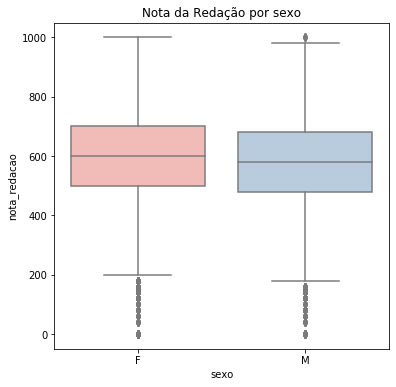

In [28]:
plt.figure(figsize = [6, 6])
sns.boxplot(data = sexo_redacao, x='sexo', y='nota_redacao', palette="Pastel1")
plt.title('Nota da Redação por sexo');

In [29]:
df_m, df_f = sexo_redacao.loc[sexo_redacao['sexo']=='M'],   sexo_redacao.loc[sexo_redacao['sexo']=='F']

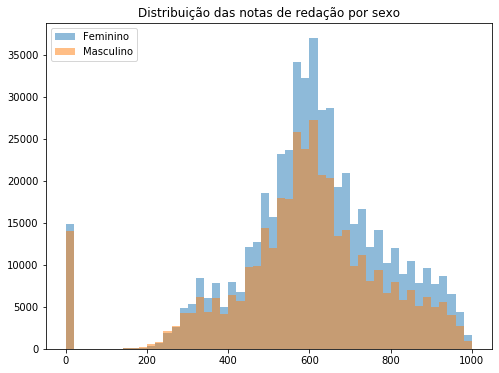

In [30]:
plt.figure(figsize=(8,6))
plt.hist(df_f['nota_redacao'], bins=50, alpha = 0.5, label='Feminino')
plt.hist(df_m['nota_redacao'], bins=50, alpha = 0.5, label='Masculino')
plt.legend(loc='upper left')
plt.title('Distribuição das notas de redação por sexo');